In [1]:
import game

from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

import agent

In [2]:
def visualize(stateHistory, actionHistory, rewardHistory, N):
    inventory = stateHistory[:, 0, :]
    orders = actionHistory[:, 1, :]
    serviceTimes = actionHistory[:, 0, :]
    reorderPoints = stateHistory[:, 1, :]
    
    print("Time Series")
    for i in range(2, -1, -1):
        plt.figure(figsize=(20, 4))
        
        alpha = 1 if i == 2 else 0.3
#         plt.step(range(N+1), inventory[:, i] * np.roll(np.sign(orders[:, i]), -1), label="inventory")        
        plt.plot(range(N+1), inventory[:, i], label="inventory", alpha=alpha, c='b', linestyle='--', drawstyle='steps')
        plt.step(range(N+1), orders[:, i], label="order quantity", c='orange')
        if i == 2:
            plt.step(range(N+1), reorderPoints[:, i], label="reorder point", c='green')
        plt.ylim((-5, 30))
        plt.legend()
    plt.show()

    print("Service Time")
    for i in range(2, -1, -1):
        plt.figure(figsize=(20, 4))
        plt.step(range(N+1), serviceTimes[:, i], label="service time")
        plt.ylim((-5, 30))
        plt.legend()
    plt.show()

    
    print("Inventory")
    for i in range(2, -1, -1):
        plt.figure(figsize=(20, 4))
        plt.step(range(N+1), inventory[:, i] * np.sign(orders[:, i]), label="inventory")
        plt.ylim((-5, 30))
        plt.legend()
    plt.show()

    print("Rewards")
    plt.figure(figsize=(20, 4))
    plt.step(range(N+1), rewardHistory)
    plt.show()

In [3]:
learningParams = {
    "gamma": 0.2,
    "alpha": 0.8, #1,
    "epsilon": 0.5
}

envParams = {
    "inventoryCost": [100, 5, 100],
    "muDemand": 2,
    "stdDemand": 0.1, #1,
    "retailerOrder": 10, #20, #
    "stockoutCost": 10000,
    "N": 1000
}

In [4]:
# create central planner
plannerAgent = agent.Planner(learningParams, envParams["retailerOrder"])

Time Series


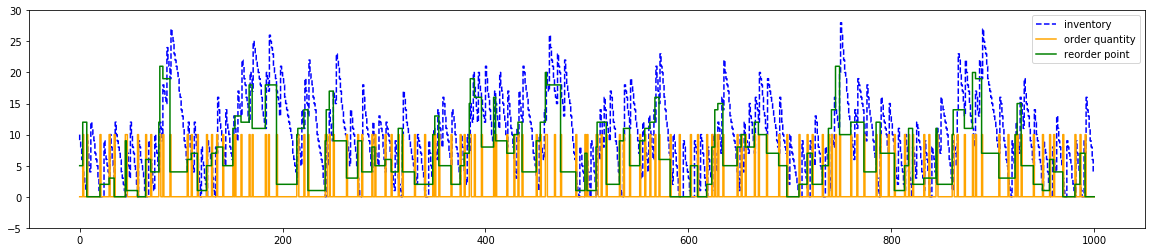

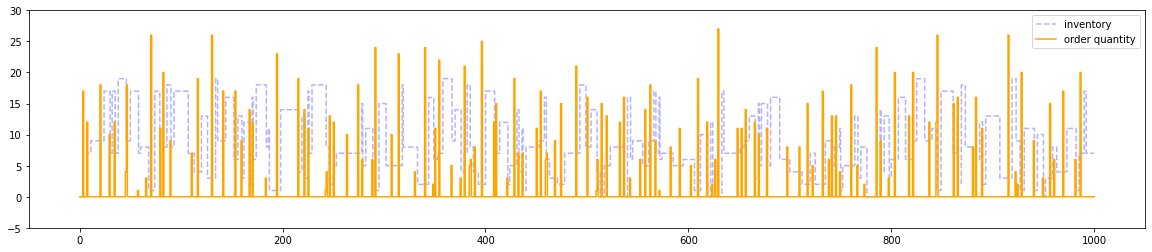

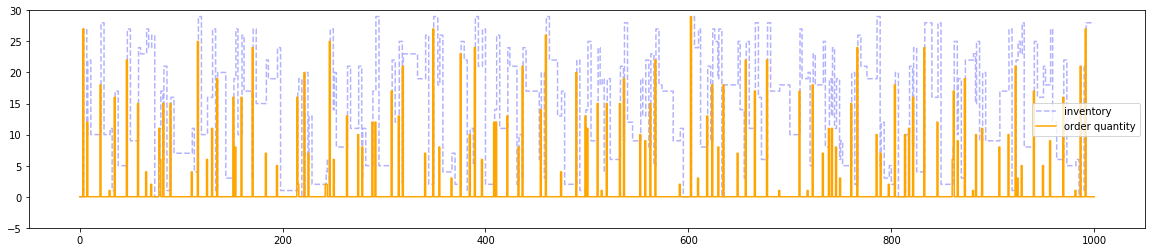

Service Time


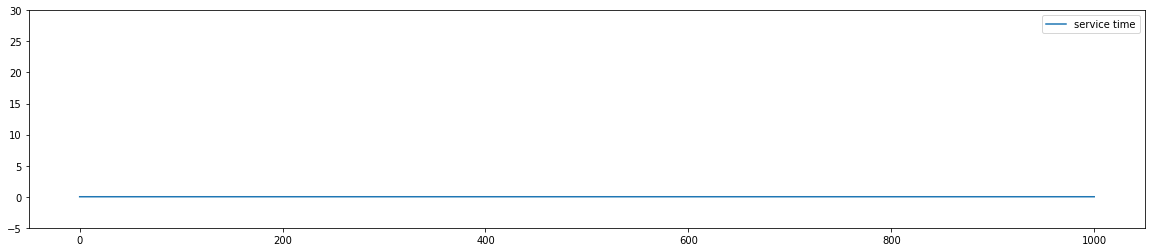

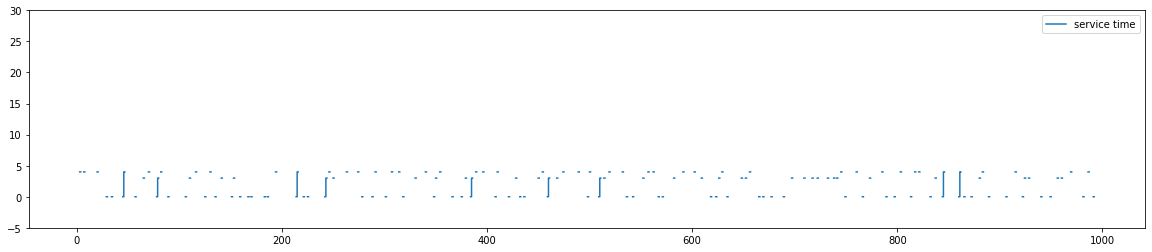

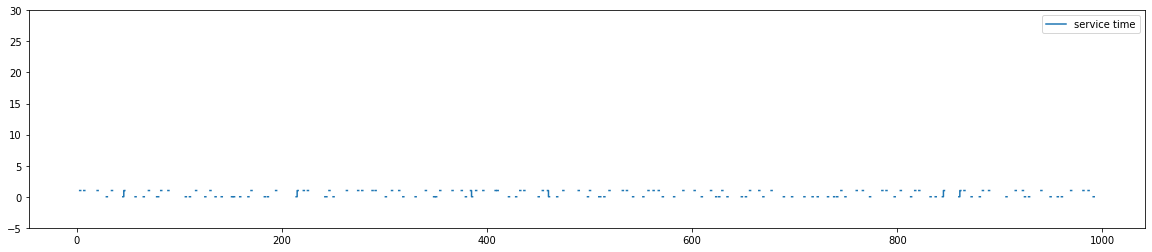

Inventory


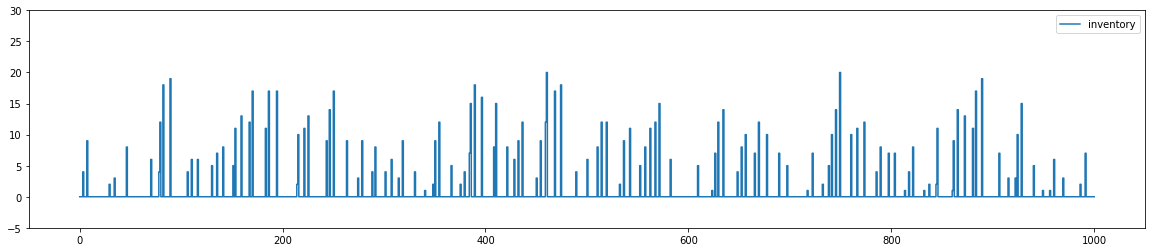

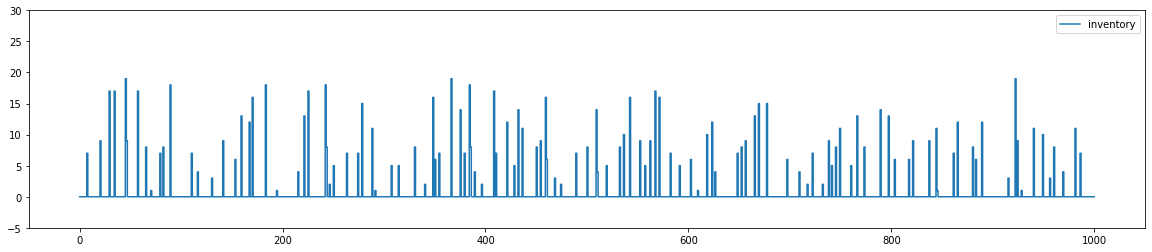

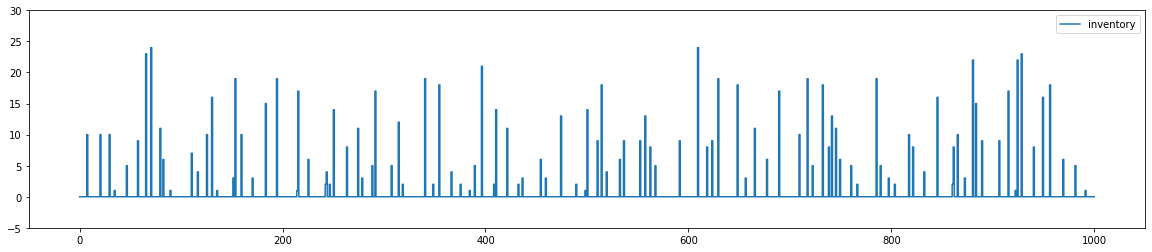

Rewards


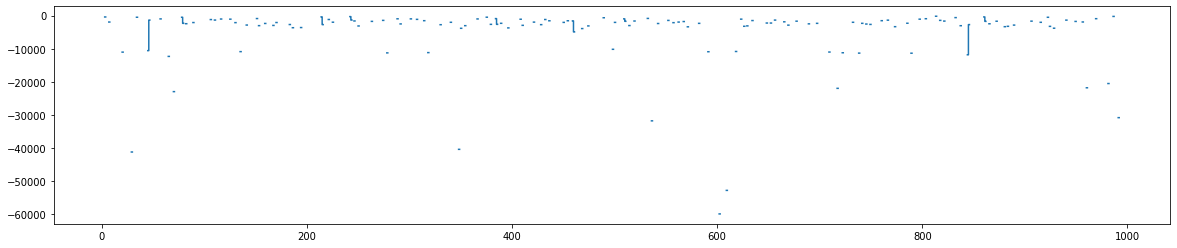

In [5]:
# play the game while training
stateHistory, actionHistory, rewardHistory = game.runEpisode(envParams, plannerAgent, train=True)

visualize(stateHistory, actionHistory, rewardHistory, envParams["N"])

In [6]:
rewardsAll = []
for _ in tqdm(range(5000)):
# play the game while training
    _, _, rewards = game.runEpisode(envParams, plannerAgent, train=True)
    averageRewards = np.nansum(rewards)/np.count_nonzero(~np.isnan(rewards))
    rewardsAll.append(averageRewards)

100%|██████████| 5000/5000 [05:32<00:00, 15.03it/s]


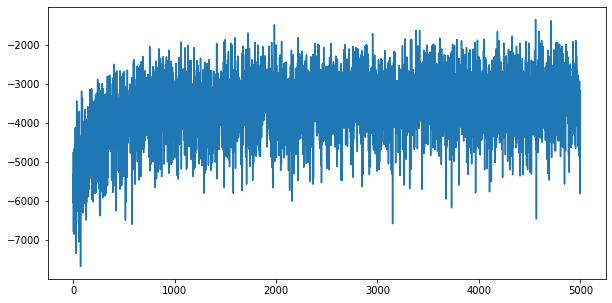

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(rewardsAll)

Time Series


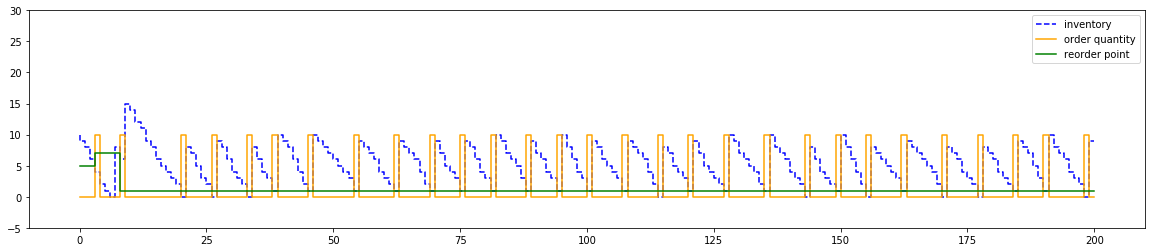

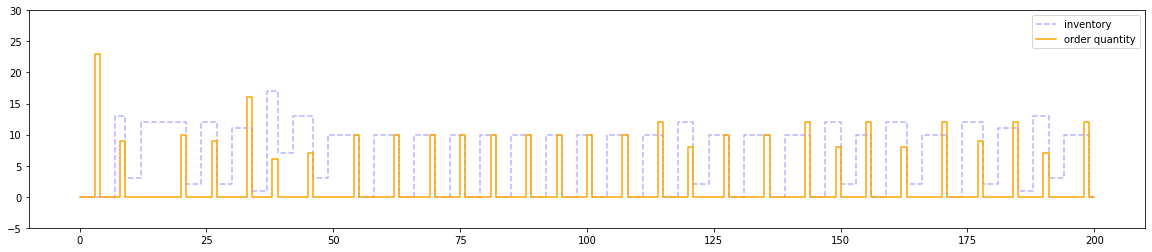

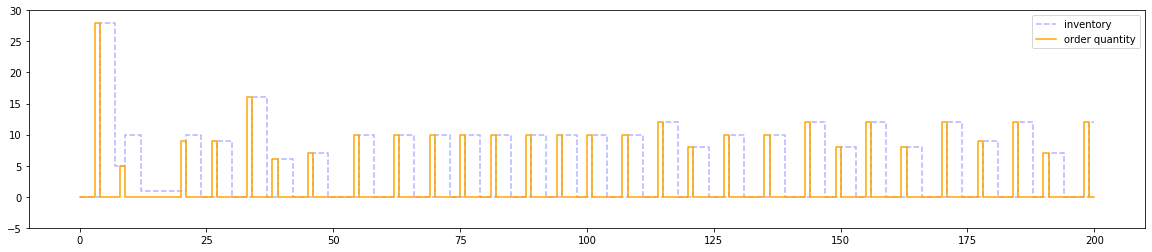

Service Time


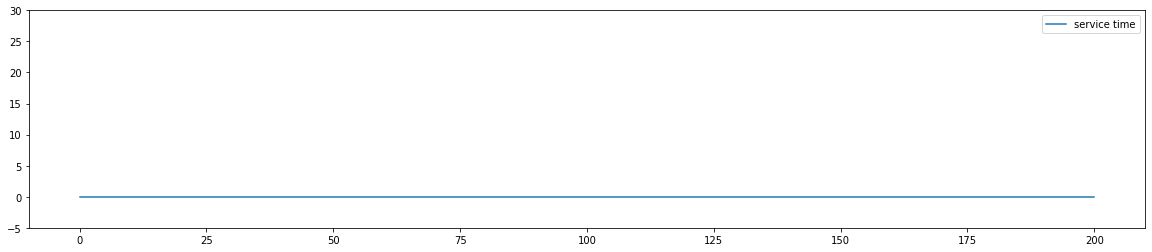

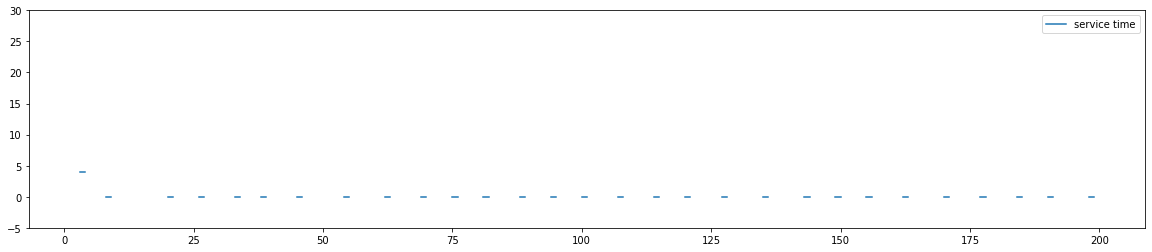

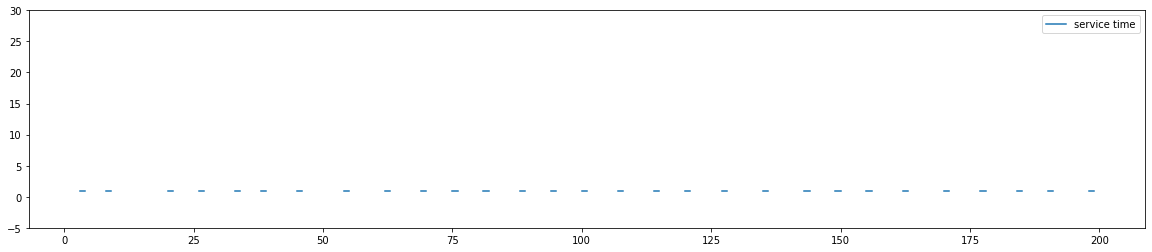

Inventory


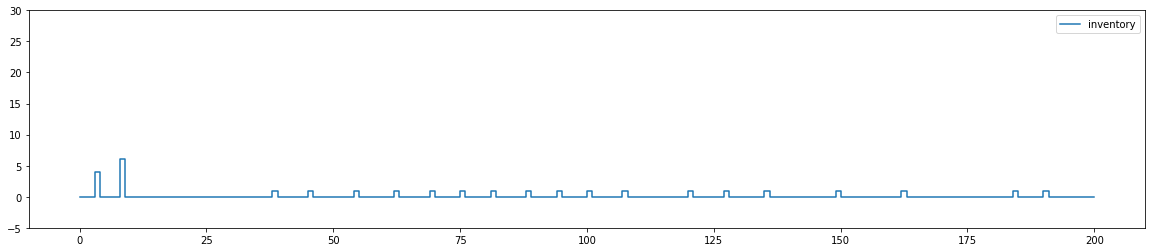

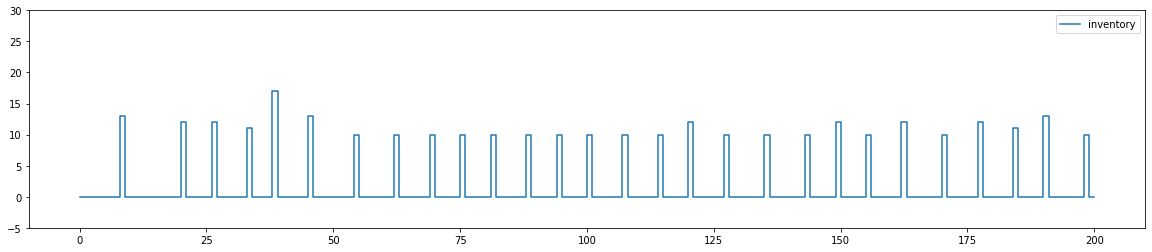

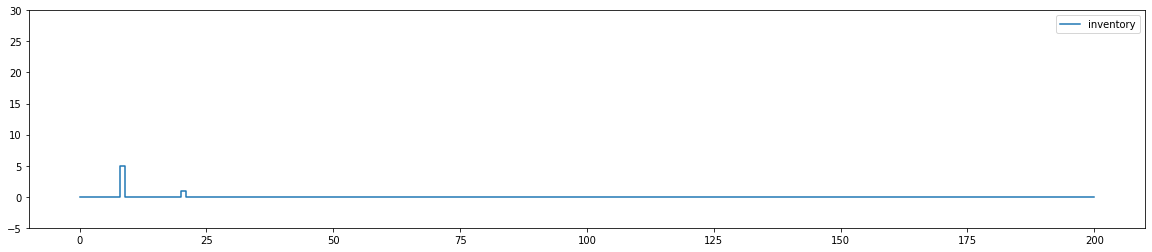

Rewards


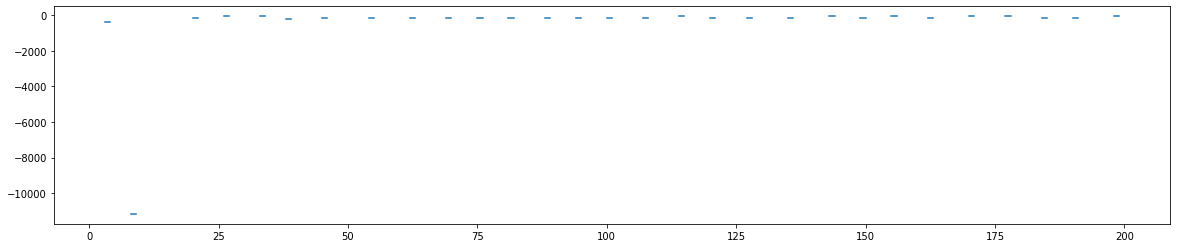

In [8]:
# play the game while training
plannerAgent.epsilon = 0
envParams["N"] = 200
stateHistory, actionHistory, rewardHistory = game.runEpisode(envParams, plannerAgent, train=False)
visualize(stateHistory, actionHistory, rewardHistory, envParams["N"])

In [9]:
# when [100, 5, 100] cost

In [10]:
# when [5, 100, 100] cost

In [11]:
# X = []
# Y = []
# size = []

# minVal = min(plannerAgent.q.obj['0_0'].values())

# for k, v in plannerAgent.q.obj['0_0'].items():
#     x, y = k.split("_")
#     X.append(float(x))
#     Y.append(float(y))
    
#     s = int(v - minVal)
#     size.append(s)
    
# plt.figure(figsize=(10, 10))
# plt.scatter(X, Y, s=size, alpha=0.3)

In [12]:
plannerAgent.q.obj

# there's a bias here. whenever that state is trained, it's always reordering
# need to think of state, action again

{'10_7_9': {'12.0_12.0_10.0_0.0': -15887.68,
  '14.0_14.0_10.0_13.0': -2006.2400000000002,
  '16.0_15.0_10.0_3.0': -1619.22179863576,
  '6.0_9.0_10.0_11.0': -2095.8900191232,
  '14.0_14.0_10.0_15.0': -2147.68,
  '19.0_17.0_10.0_8.0': -2767.8843387904,
  '15.0_21.0_10.0_8.0': -1361.8048753214366,
  '19.0_7.0_10.0_12.0': -3145.0687578595584,
  '13.0_6.0_10.0_10.0': -2152.4264607239325,
  '18.0_20.0_10.0_16.0': -2255.957248,
  '0.0_7.0_10.0_12.0': -1591.6973511589704,
  '14.0_3.0_10.0_18.0': -4276.76279436047,
  '0.0_9.0_10.0_16.0': -1610.5199616000002,
  '0.0_4.0_10.0_14.0': -1761.0712665128228,
  '2.0_6.0_10.0_0.0': -6873.407915553587,
  '15.0_5.0_10.0_9.0': -2452.1294712273216,
  '8.0_7.0_10.0_3.0': -1445.97525538051,
  '13.0_17.0_10.0_1.0': -809.1150586190379,
  '14.0_19.0_10.0_3.0': -871.1346144877533,
  '13.0_16.0_10.0_3.0': -867.1037287662241,
  '17.0_14.0_10.0_3.0': -1424.1978419674992,
  '10.0_20.0_10.0_17.0': -1433.1723192666104,
  '0.0_5.0_10.0_7.0': -1019.5463343003244,
  '6.0

In [13]:
"""
Visualize Value Network
"""

'\nVisualize Value Network\n'

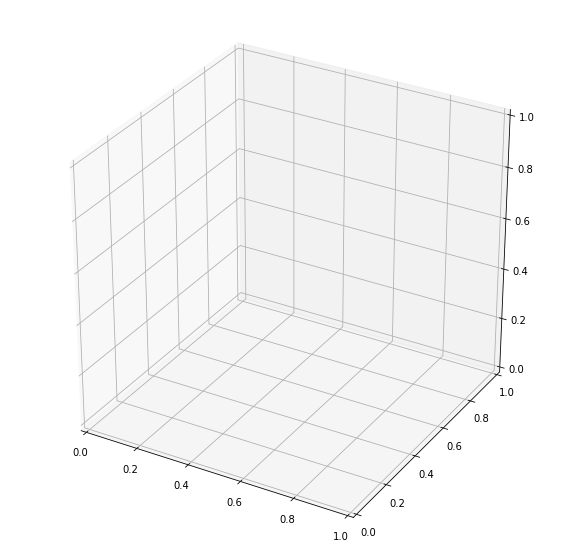

In [54]:


from mpl_toolkits.mplot3d import Axes3D 
from tqdm import tqdm_notebook

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
X = []
Y = []
Z = []

# get value function
for k, v in tqdm_notebook(plannerAgent.q.obj.items()):
    x, y, _ = k.split("_")
    if len(v) > 0:
        z = max([val for _, val in v.items()])
#         ax.scatter(int(x), int(y), z, 'o', c='b', alpha=0.5)
        X.append(x)
        Y.append(y)
        Z.append(z)
#     break
    
# plt.show()


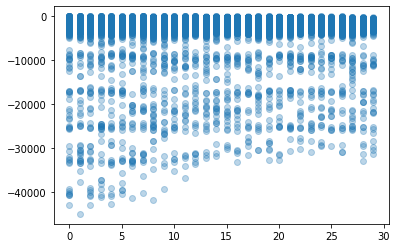

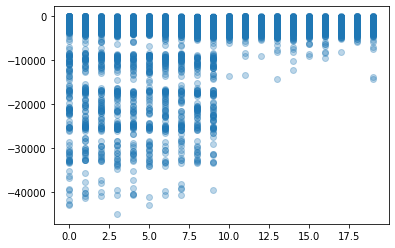

In [55]:
X = [int(x) for x in X]
Y = [int(y) for y in Y]

plt.scatter(X, Z, alpha=0.3)
plt.show()

plt.scatter(Y, Z, alpha=0.3)
plt.show()

(-1600, 0)

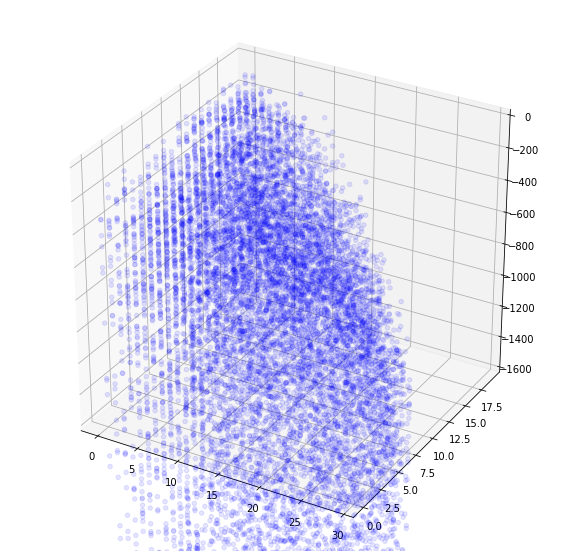

In [56]:

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, Z, 'o', c='b', alpha=0.1)
ax.set_zlim(-1600, 0)
# ax.view_init(20, 95)

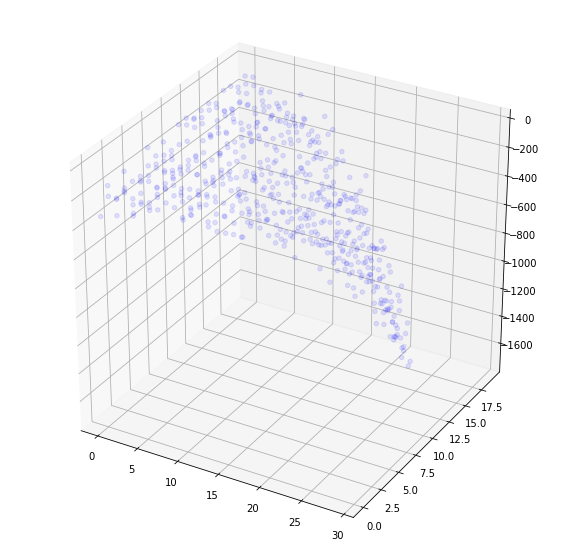

In [46]:
import pandas as pd

df = pd.DataFrame(zip(X, Y, Z))
df = df.groupby([0, 1]).max().reset_index().values

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df[:,0], df[:,1], df[:,2], 'o', c='b', alpha=0.1)
# ax.view_init(20, 95)

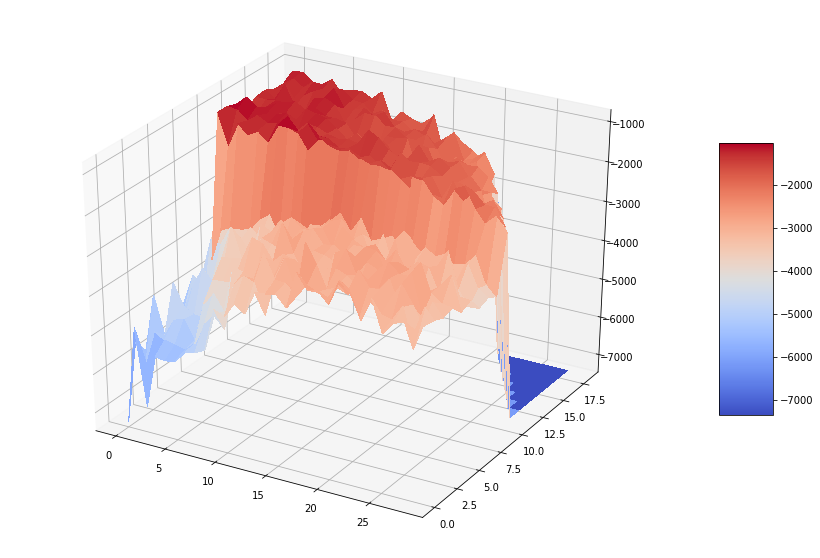

In [96]:
from matplotlib import cm

fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')

df = pd.DataFrame(zip(X, Y, Z))
df = df.groupby([0, 1]).mean().reset_index()

Xax = np.arange(df[0].min(), df[0].max(), 1)
Yax = np.arange(df[1].min(), df[1].max(), 1)
Xax, Yax = np.meshgrid(Xax, Yax)

Zax = np.zeros(Xax.shape)
for i in range(Xax.shape[0]):
    for j in range(Xax.shape[1]):
        z = df[(df[0]==Xax[i, j]) & (df[1]==Yax[i, j])][2]
        if z.shape[0] > 0:
            Zax[i, j] = z
        else:
            Zax[i, j] = min(df[2])
# Plot the surface.
surf = ax.plot_surface(Xax, Yax, Zax, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# ax.set_zlim(-199.48181, -199.48180)
# ax.view_init(30, 80)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [85]:
df[df[0]==0]

0   1            2
0   0   0 -7334.213419
1   0   1 -5437.134460
2   0   2 -5819.873139
3   0   3 -5996.690243
4   0   4 -6075.275768
5   0   5 -5731.814057
6   0   6 -5238.369339
7   0   7 -4921.583784
8   0   8 -4828.089085
9   0   9 -4625.990704
10  0  10 -1033.985727
11  0  11 -1037.776200
12  0  12 -1118.733959
13  0  13 -1411.181304
14  0  14 -1230.523576
15  0  15 -1197.375794
16  0  16 -1312.641886
17  0  17 -1314.013633
18  0  18 -1136.421702
19  0  19 -1323.834573